
# Lab Week 05 (15.4.2025): Exploring Interaction Effects in Depression Treatment

In this notebook, you'll analyze data from a study that compared the effectiveness of three treatments (A, B, and C) for severe depression.

We aim to determine whether the effect of **age** on **effectiveness** depends on the **treatment** received.

The data includes:
- `age`: The age of the patient
- `TRT`: The treatment group (A, B, or C)
- `y`: The effectiveness of the therapy, a score measuring improvement

---

## 📋 Tasks

1. Explore the data
2. Fit a baseline regression model (additive only)
3. Add interaction terms to the model
4. Compare both models and interpret
5. Perform model diagnostics
6. Predict value for a new datapoint and estimate the uncertainty 


In [7]:
# Run this cell to import the packages used and to load the data
import pandas as pd
import numpy as np

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)



# Load dataset
url = 'https://online.stat.psu.edu/stat501/sites/stat501/files/data/depression.txt'
df = pd.read_csv(url, sep='\t')
df = df.drop(['x2','x3'], axis = 1)

# Preview data
df.head()

,y,age,TRT
0,56,21,A
1,41,23,B
2,40,30,B
3,28,19,C
4,55,28,A



## 🔍 Task 1: Data Exploration

Inspect the structure of the dataset and visualize the relationship between `age` and `y` across treatment groups.


In [8]:
#solution
df.describe()

,y,age
count,36.000000,36.000000
mean,55.166667,44.111111
std,12.415428,14.628305
min,25.000000,19.000000
25%,46.750000,32.250000
50%,58.000000,44.000000
75%,63.250000,56.500000
max,73.000000,67.000000


In [9]:
df['TRT'].value_counts()

TRT
A    12
B    12
C    12
Name: count, dtype: int64

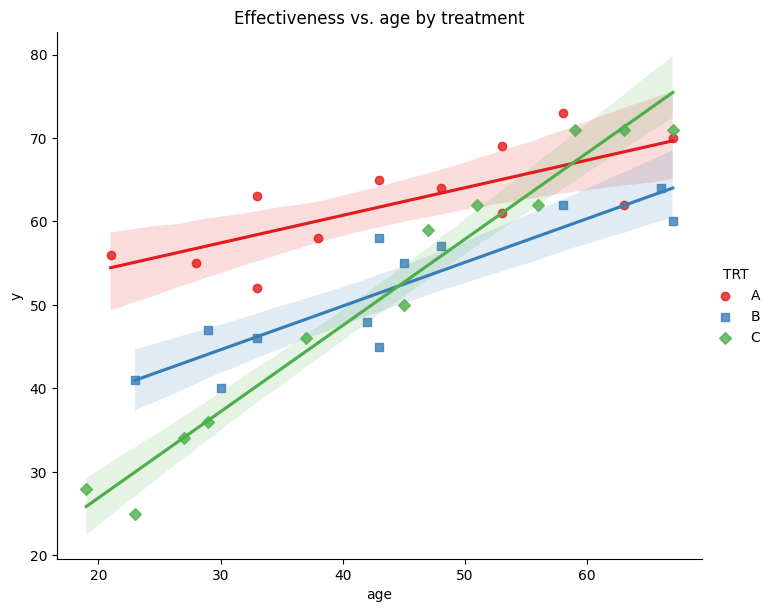

In [10]:
# Visualize relationship (note: you can also use different plot types such as a scatter plot. The lmplot (linear model plot) is specifically
# useful here beacuse it already demonstrates the difference in how the relationship between age and effectiveness is influenced by the treatment type)
sns.lmplot(x='age', y='y', hue='TRT', data=df, markers=['o', 's', 'D'], palette='Set1', height=6, aspect=1.2)
plt.title('Effectiveness vs. age by treatment')
plt.show()


## 🧮 Task 2: Baseline Model

Fit a multiple linear regression model predicting `y` from:
- `age`
- `TRT` (careful: this is a categorical variable)

Interpret the model output.

In [11]:
# solution

# Transform treatment datatype to category
df['TRT'] = df['TRT'].astype('category')

# Fit baseline model
design_baseline = MS(['age','TRT']).fit(df)
X_baseline = design_baseline.transform(df)
y = df['y']
model_baseline = sm.OLS(y,X_baseline).fit()
print(model_baseline.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     38.71
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           9.29e-11
Time:                        10:34:18   Log-Likelihood:                -113.68
No. Observations:                  36   AIC:                             235.4
Df Residuals:                      32   BIC:                             241.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     32.5433      3.581      9.088      0.0

/opt/tljh/user/lib/python3.9/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
/opt/tljh/user/lib/python3.9/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
/opt/tljh/user/lib/python3.9/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
/opt/tljh/user/lib/

The model explains 78.4% of the variation in the effectiveness of the treatment which is a reasonable value. The F-statistic and its associated P-value show that the model is overall significant. The model suggests that age contributes positively to the effectiveness of the treatment, similarly the positive coefficients of both treatment coefficients indicate that they have a negative influence to the therapy effectiveness compared to treatment A.

All model coefficients are significant.

## 🔁 Task 3: Interaction Model

Now fit a model that additionally to the model from Task 2 includes interaction terms between `age` and `TRT`.

Interpret whether age affects effectiveness differently depending on TRT.


In [12]:
# solution

#create design matrix
design_interaction = MS(['age','TRT',('age', 'TRT')]).fit(df)
X_interaction = design_interaction.transform(df)

# Fit interaction model
model_interaction = sm.OLS(y,X_interaction).fit()
print(model_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     64.04
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           4.26e-15
Time:                        10:34:18   Log-Likelihood:                -97.024
No. Observations:                  36   AIC:                             206.0
Df Residuals:                      30   BIC:                             215.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     47.5156      3.825     12.422      0.0

/opt/tljh/user/lib/python3.9/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
/opt/tljh/user/lib/python3.9/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
/opt/tljh/user/lib/python3.9/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
/opt/tljh/user/lib/

The interaction model explains 91.4% of the variation in treatment effectiveness, an improvement over the baseline model. The model is statistically significant overall, as indicated by the F-statistic and its low P-value.

This model allows the effect of age to vary by treatment group. The significant interaction terms indicate that the relationship between age and treatment effectiveness is not the same across groups.

- For example, the interaction term for Age × Treatment A suggests that age has a different impact on effectiveness for patients in Treatment A compared to the reference group (Treatment C).
- Likewise, the interaction with Treatment B captures a distinct age effect in that group.

All main effects and interaction terms are significant, suggesting that both treatment type and age, as well as their interaction, contribute meaningfully to explaining treatment effectiveness.


## 📊 Task 4: Compare Models

Compare both models using R-squared and adjusted R-squared. Summarize which model is better and what the interaction terms tell you. Finally show how the model with interaction term leads to one regression line per treatment type. Write down the equations of the three regression lines.

In [13]:

comparison = pd.DataFrame({
    "Model": ["Baseline", "Interaction"],
    "R-squared": [model_baseline.rsquared, model_interaction.rsquared],
    "Adj. R-squared": [model_baseline.rsquared_adj, model_interaction.rsquared_adj]
})
comparison


,Model,R-squared,Adj. R-squared
0,Baseline,0.783953,0.763698
1,Interaction,0.914338,0.900061


When comparing the two models, the **interaction model** shows a **higher R-squared (83.2%) and adjusted R-squared** than the baseline additive model (78.4%), indicating it explains more variation in the outcome. These improvements indicate that including interaction terms leads to a **statistically and practically better model**. It reveals that the **effect of age on effectiveness is treatment-dependent**, which the additive model cannot capture. In conclusion, the interaction model not only fits the data better, but also provides a **more nuanced understanding** of how treatment and age interact to influence therapy outcomes.

The equations of lines are computed below:

In [14]:
print('Effectivity of treatment A:          y = ', model_interaction.params['intercept'], ' + ', model_interaction.params['age'], ' * age') 
print('Effectivity of treatment B:          y = ', model_interaction.params['intercept'] + model_interaction.params['TRT[B]'], ' + ', model_interaction.params['age'] + model_interaction.params['age:TRT[B]'], ' * age') 
print('Effectivity of treatment C:          y = ', model_interaction.params['intercept'] + model_interaction.params['TRT[C]'], ' + ', model_interaction.params['age'] + model_interaction.params['age:TRT[C]'], ' * age')

Effectivity of treatment A:          y =  47.51559132059187  +  0.33050725678976955  * age
Effectivity of treatment B:          y =  28.91820610256229  +  0.5236841115166102  * age
Effectivity of treatment C:          y =  6.211381193582369  +  1.033390871275358  * age


## 🧪 Task 5: Model Diagnostics

Now that we have fitted our final model (with interaction terms), let’s assess how well it meets the assumptions of linear regression.

We’ll perform the following diagnostics:

- **Residual Plot**: Check for randomness in residuals. (Hint: see the [lab to Chapter 2](https://islp.readthedocs.io/en/latest/labs/Ch03-linreg-lab.html) for instructions how to compute residuals and how to plot the residual plot)
- **Standardized Residuals**: Identify potential outliers. These are defined as observations with $|\text{standardized residual}| \leq 3$. Standardized residuals can be computed by applying the [`get_influence()`](https://www.statsmodels.org/0.9.0/generated/statsmodels.stats.outliers_influence.OLSInfluence.html#statsmodels.stats.outliers_influence.OLSInfluence) method to the model, and by then accessing the [`resid_studentized_internal`]() attribute of the output.
- **Leverage**: Identify observations that have unusual predictor values. To do so, compute the leverage statistic by taking the `hat_matrix_diag` attribute f the value returned by the `get_influence()` method which has to be applied to the trained model. Use $2 \cdot \frac{p+1}{n}$ as cutoff value for high-leverage observations.

### ➤ Why?
These checks help us validate our model's assumptions and identify points that may disproportionately affect model results.

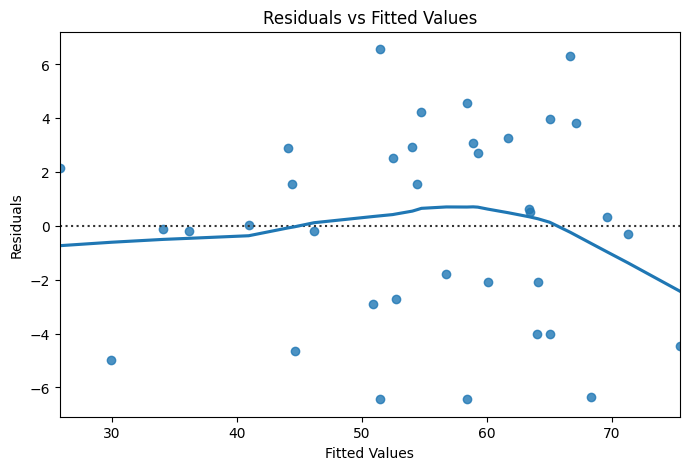

In [15]:
# solution

# Residuals and fitted values
fitted_vals = model_interaction.fittedvalues
residuals = model_interaction.resid
standardized_resid = model_interaction.get_influence().resid_studentized_internal

# Residual Plot (note: here we use sns.residplot which leads to somewhat more functionality and a somewhat more appealing plot than a mere scatter plot as in the lab. The latter would be totally fine though)
plt.figure(figsize=(8, 5))
sns.residplot(x=fitted_vals, y=residuals, lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

In [16]:
# solution
# Outlier detection
outliers = df[np.abs(standardized_resid) > 3]
print(f"Number of potential outliers (|standardized residual| > 3): {len(outliers)}")
outliers

Number of potential outliers (|standardized residual| > 3): 0


,y,age,TRT


In [17]:
# solution
# Leverage analysis
influence = model_interaction.get_influence()
leverage = influence.hat_matrix_diag
cutoff = 2 * (model_interaction.df_model + 1) / len(df)
high_leverage = df[leverage > cutoff]

print(f"Cutoff for high leverage: {cutoff:.3f}")
print(f"Number of high leverage points: {len(high_leverage)}")
high_leverage

Cutoff for high leverage: 0.333
Number of high leverage points: 0


,y,age,TRT


## 🔮 Task 6: Prediction with Confidence and Prediction Intervals

Use the final model to predict the effectiveness for a **new patient**:

- Age = 45
- Treatment = A

Calculate:
- A **confidence interval** for the mean effectiveness for this group
- A **prediction interval** for an individual with these characteristics

### ➤ Why?
Understanding prediction vs. confidence intervals is critical:
- **Confidence Interval**: Tells us where the **mean** outcome is likely to lie.
- **Prediction Interval**: Tells us where a **single new observation** is likely to fall, accounting for more uncertainty.

> Provide your interpretation of both intervals in context.

In [20]:
new_patient

,intercept,age,TRT[B],TRT[C],age:TRT[B],age:TRT[C]
0,1.0,45,0.0,0.0,0.0,0.0


In [19]:
new_patient_raw

,age,TRT
0,45,A


In [18]:
# solution
# Create new patient
new_patient_raw = pd.DataFrame({'age': [45], 'TRT': ['A']})
new_patient_raw['TRT'] = new_patient_raw['TRT'].astype('category')
new_patient = design_interaction.transform(new_patient_raw)

# Predict
prediction = model_interaction.get_prediction(new_patient)
summary = prediction.summary_frame(alpha=0.05)
summary

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,62.388418,1.133106,60.074308,64.702528,54.045328,70.731508


*Solution*
### 🧠 Interpretation

- **Confidence Interval**: Range for the **mean effectiveness** of similar patients receiving treatment A at age 45.
- **Prediction Interval**: Wider range for the **effectiveness of a single individual** with those characteristics.

Prediction intervals are always wider than confidence intervals due to extra uncertainty in individual outcomes.